In [587]:
import pandas as pd
import numpy as np

In [588]:
transaction_history_1 = pd.read_csv("../transaction_history_csv/sep-dec.csv")
transaction_history_2 = pd.read_csv("../transaction_history_csv/jun-sep.csv")
transaction_history = pd.concat([transaction_history_1, transaction_history_2])

# transaction_history = transaction_history[transaction_history["Reference"] == "UMC-S"]
transaction_history["Transaction Date"] = pd.to_datetime(transaction_history["Transaction Date"])
transaction_history["Debit Amount"] = transaction_history["Debit Amount"].replace({' ': np.nan})
transaction_history["Debit Amount"] = transaction_history["Debit Amount"].astype(float)
transaction_history["Date"] = transaction_history["Transaction Date"].dt.strftime('%b %d')
transaction_history["Month"] = transaction_history["Transaction Date"].dt.strftime('%m %b')
transaction_history["Vendor"] = transaction_history["Transaction Ref1"].fillna(transaction_history["Transaction Ref2"])

transaction_history

,Transaction Date,Reference,Debit Amount,Credit Amount,Transaction Ref1,Transaction Ref2,Transaction Ref3,Unnamed: 7,Date,Month,Vendor
0,2024-12-01,UMC-S,41.99,,NaN,COTTON ON SINGAPORE PT SI NG 30NOV,5264-7110-0390-7302,NaN,Dec 01,12 Dec,COTTON ON SINGAPORE PT SI NG 30NOV
1,2024-12-01,UMC-S,16.38,,NaN,BUS/MRT 542846245 SI NG 22NOV,5264-7110-0390-7302,NaN,Dec 01,12 Dec,BUS/MRT 542846245 SI NG 22NOV
2,2024-11-29,UMC-S,22.40,,MCDONALD'S (PS) SI NG 25NOV,5264-7110-0390-7302,NaN,NaN,Nov 29,11 Nov,MCDONALD'S (PS) SI NG 25NOV
3,2024-11-28,UMC-S,22.80,,EAT 3 BOWLS SI NG 26NOV,5264-7110-0390-7302,NaN,NaN,Nov 28,11 Nov,EAT 3 BOWLS SI NG 26NOV
4,2024-11-27,UMC-S,4.60,,MCDONALDS 930201 SI NG 26NOV,5264-7110-0390-7302,NaN,NaN,Nov 27,11 Nov,MCDONALDS 930201 SI NG 26NOV
...,...,...,...,...,...,...,...,...,...,...,...
108,2024-06-13,UMC-S,13.21,,BUS/MRT 449978088 SI NG 04JUN,5264-7110-1009-8095,NaN,NaN,Jun 13,06 Jun,BUS/MRT 449978088 SI NG 04JUN
109,2024-06-09,UMC-S,10.90,,POPEYES - THE SELETAR SI NG 31MAY,5264-7110-1009-8095,NaN,NaN,Jun 09,06 Jun,POPEYES - THE SELETAR SI NG 31MAY
110,2024-06-08,UMC-S,10.80,,BUS/MRT 447292638 SI NG 30MAY,5264-7110-1009-8095,NaN,NaN,Jun 08,06 Jun,BUS/MRT 447292638 SI NG 30MAY
111,2024-06-06,ICT,21.00,,PayNow Transfer 8688249,To: Yuta,OTHR PayNow Transfer,NaN,Jun 06,06 Jun,PayNow Transfer 8688249


In [589]:
import re

def remove_special_characters(string):
    return "".join(e for e in string.lower() if e.isalnum())

def check_if_string_in_list(original_string, reference_list):
    if not isinstance(original_string, str):
        return False
    original_list = [remove_special_characters(s) for s in re.split("\\s+|\.|\@|\*|\/|\_|\-", original_string)]
    return any([x in reference_list for x in original_list])

check_if_string_in_list("WOOWFLES_KALLING", restaurant_list)

True

In [590]:
with open("../restaurants.txt") as restaurants:
    lines = restaurants.readlines()

    restaurant_list = []
    for line in lines:
        line = [remove_special_characters(e) for e in line.split(", ")]
        restaurant_list.extend(line)

    restaurant_list = list(set(restaurant_list))

print(restaurant_list)

['burpple', 'omakaseburger', 'eat', 'boontongkee', 'canopygardendining', 'fanta', 'bacicafã', 'koolaid', 'chickenup', 'thecoffeebeantealeaf', 'saigonstreet', 'magicofindia', 'peranakancorner', 'cupcake', 'pepsi', 'breadtalk', 'chatramue', 'wokthisway', 'poketheory', 'soupsupreme', 'bagel', 'elemen', 'cactusjackâs', 'haidilaohotpot', 'gyuya', 'blk85', 'sushiro', 'bang', 'whiskpaddle', 'takashimayafoodcourt', 'singaporeâshawkerchan', 'joochiatcafe', 'yakinikuyazawa', 'shabushabuonyasai', 'steak', 'springrolls', 'kyosushi', 'dâgoodcafã', 'ramen', 'monster', 'spize', 'pezzo', 'kumo', 'sorbet', 'seafoodparadise', 'sushijin', 'thepizzacompany', 'lalevain', 'cafãamazon', 'pokelife', 'tonguetiplanzhoubeefnoodle', 'izydining', 'chilliâs', 'tcc', 'thewholekitchen', 'shanghaipavilion', 'thegardenslug', 'nanjyamonjya', 'kopitiam', 'gusto', 'thebotanist', 'cheesecake', 'superfry', 'tanglinmallfoodcourt', 'fishballstory', 'justacia', 'thenakedfinn', 'theramenhouse', 'kfc', 'pizzahut', 'yummythai', '

In [591]:
transaction_history["Category"] = transaction_history["Vendor"].apply(lambda x: check_if_string_in_list(x, restaurant_list))
transaction_history["Category"] = transaction_history["Category"].apply(lambda x: "F&B" if x else "Others")
transaction_history["Category"].value_counts()

Category
Others    260
F&B        73
Name: count, dtype: int64

In [592]:
transaction_history[transaction_history["Category"]=="F&B"][["Vendor", "Category"]].to_csv("../transaction_history_csv/out.csv", index=False)

In [593]:
transaction_history

,Transaction Date,Reference,Debit Amount,Credit Amount,Transaction Ref1,Transaction Ref2,Transaction Ref3,Unnamed: 7,Date,Month,Vendor,Category
0,2024-12-01,UMC-S,41.99,,NaN,COTTON ON SINGAPORE PT SI NG 30NOV,5264-7110-0390-7302,NaN,Dec 01,12 Dec,COTTON ON SINGAPORE PT SI NG 30NOV,Others
1,2024-12-01,UMC-S,16.38,,NaN,BUS/MRT 542846245 SI NG 22NOV,5264-7110-0390-7302,NaN,Dec 01,12 Dec,BUS/MRT 542846245 SI NG 22NOV,Others
2,2024-11-29,UMC-S,22.40,,MCDONALD'S (PS) SI NG 25NOV,5264-7110-0390-7302,NaN,NaN,Nov 29,11 Nov,MCDONALD'S (PS) SI NG 25NOV,F&B
3,2024-11-28,UMC-S,22.80,,EAT 3 BOWLS SI NG 26NOV,5264-7110-0390-7302,NaN,NaN,Nov 28,11 Nov,EAT 3 BOWLS SI NG 26NOV,F&B
4,2024-11-27,UMC-S,4.60,,MCDONALDS 930201 SI NG 26NOV,5264-7110-0390-7302,NaN,NaN,Nov 27,11 Nov,MCDONALDS 930201 SI NG 26NOV,F&B
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2024-06-13,UMC-S,13.21,,BUS/MRT 449978088 SI NG 04JUN,5264-7110-1009-8095,NaN,NaN,Jun 13,06 Jun,BUS/MRT 449978088 SI NG 04JUN,Others
109,2024-06-09,UMC-S,10.90,,POPEYES - THE SELETAR SI NG 31MAY,5264-7110-1009-8095,NaN,NaN,Jun 09,06 Jun,POPEYES - THE SELETAR SI NG 31MAY,F&B
110,2024-06-08,UMC-S,10.80,,BUS/MRT 447292638 SI NG 30MAY,5264-7110-1009-8095,NaN,NaN,Jun 08,06 Jun,BUS/MRT 447292638 SI NG 30MAY,Others
111,2024-06-06,ICT,21.00,,PayNow Transfer 8688249,To: Yuta,OTHR PayNow Transfer,NaN,Jun 06,06 Jun,PayNow Transfer 8688249,Others


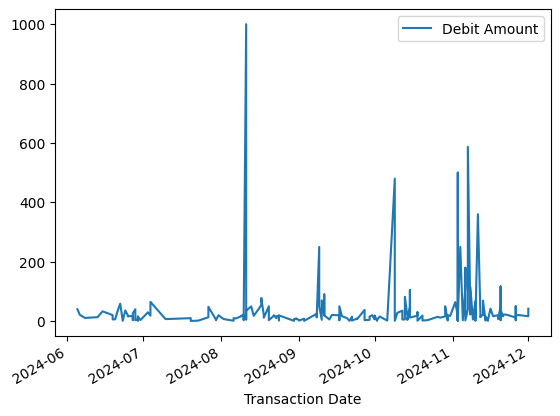

In [594]:
def get_category(df, category):
    return df[df["Category"]==category]

def plot_debit_amount(df):
    df[df["Debit Amount"].notna()][["Transaction Date", "Debit Amount"]].set_index("Transaction Date").plot()

plot_debit_amount(get_category(transaction_history, "Others"))

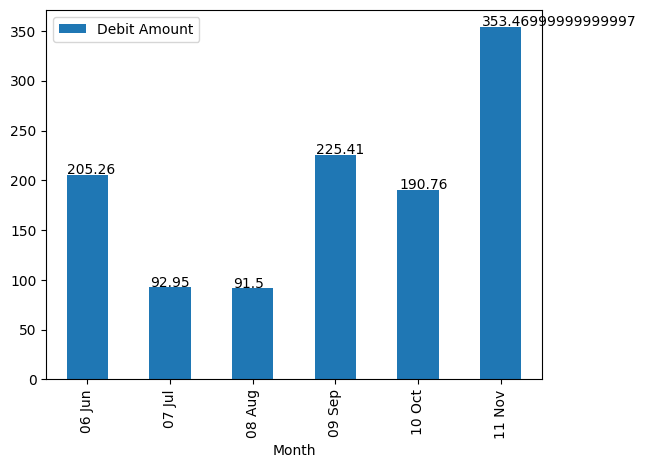

In [597]:
def get_monthly_spending(df):
    df = df[df["Debit Amount"].notna()]
    ax = df[["Month", "Debit Amount"]].groupby("Month").sum().plot.bar()
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

get_monthly_spending(get_category(transaction_history, "F&B"))